 Classification:

 1. Linear regression
 2. Logistic regression

 3. Support vector machine


# Linear regression

1. Generate 1D data synthetically
2. Take the earlier designed linear regression class
3. Find the fitting line 
4. Taking 0.5 as threshold, see the classification    

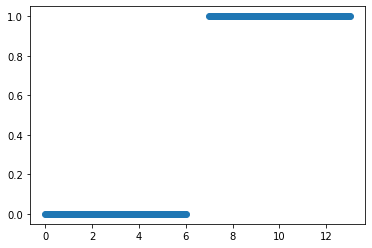

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# insert your code here
y1 = np.zeros(100)
y2 = np.ones(100)
y = np.concatenate((y1,y2))
x1 = np.linspace(0,6,100)#np.concatenate((np.linspace(0,6,100).reshape(100,1),np.zeros(100).reshape(100,1)),axis=1)
x2 = np.linspace(7,13,100)#np.concatenate((np.linspace(7,13,100).reshape(100,1),np.ones(100).reshape(100,1)),axis=1)
x = np.concatenate((x1,x2))
plt.scatter(x,y)


Defining linear regression class

In [5]:
# linear regression class
class lin_regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def grad_update(self,w_old,lr,y,x):
    w = w_old + 2*lr*(x @ (y - x.T @ w_old))/y.shape[0]
    return w

  def error(self,w,y,x):
    return np.sum(np.square(y - x.T @ w))/y.shape[0]

  def mat_inv(self,y,x_aug):
    return np.linalg.pinv(x_aug @ x_aug.T) @ x_aug @ y
    # by Gradien descent
  def Regression_grad_des(self,x,y,lr):
    err=[]
    w_pred = np.random.rand(x.shape[0],1)
    for i in range(1000):
      err.append(self.error(w_pred,y,x))
      w_pred = self.grad_update(w_pred,lr,y,x)
    err = np.asarray(err)

    return w_pred,err


Data augmentation and optimal weight generation

In [ ]:
x=x[:,np.newaxis] 
x=x.T     # to make this in M x N format, where M is the dimension
print(x.shape)
x_aug=np.concatenate((np.ones((1,x.shape[1])), x),axis=0)
print(x_aug.shape)

y=y[:,np.newaxis]

ln_reg=lin_regression()
w_opt=ln_reg.mat_inv(y,x_aug)


(1, 200)
(2, 200)


In [ ]:
w_opt

array([[-0.24294904],
       [ 0.11429985]])

1. Optimal separating plane generation
2. Classification (0.5 as threshold)


[[-0.24294904]
 [ 0.11429985]]
[[-0.23851624]
 [ 0.11379699]]


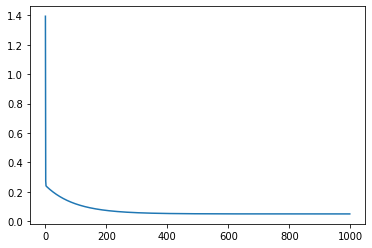

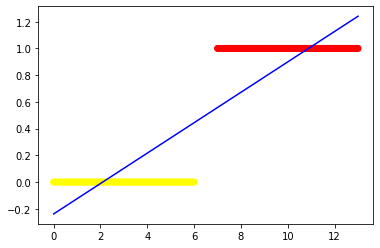

In [ ]:
print(w_opt)
lr=0.01
w_predicted, error = ln_reg.Regression_grad_des(x_aug,y,lr)
print(w_predicted)
plt.plot(error[1:])
plt.show()
# print(x)
x_1 = np.linspace(0,13,200)
y_1 = w_predicted[0] + w_predicted[1]*x_1
y_2 = [(1 if y_3>0.5 else 0) for y_3 in y_1]
plt.scatter(x.T,y,c=y_2[::-1],cmap='autumn')
plt.plot(x_1,y_1,'b')
plt.show()
# insert your code here


## Draw back of linear regression based classification
1. Generate data (have outlairs noise)
2. Find the fitting line.
3. Using 0.5 as threshold, see the classification
4. using matrix inversion (home work)


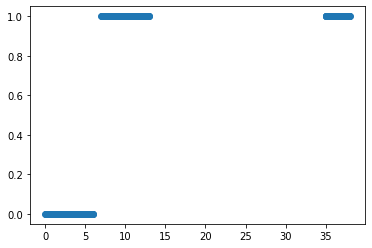

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# insert your code here
y1 = np.zeros(100)
y2 = np.ones(100)
y3 = np.ones(100)
y = np.concatenate((y1,y2,y3))
x1 = np.linspace(0,6,100)#np.concatenate((np.linspace(0,6,100).reshape(100,1),np.zeros(100).reshape(100,1)),axis=1)
x2 = np.linspace(7,13,100)#np.concatenate((np.linspace(7,13,100).reshape(100,1),np.ones(100).reshape(100,1)),axis=1)
x3 = np.linspace(35,38,100)
x = np.concatenate((x1,x2,x3))
plt.scatter(x,y)

Augment data

In [ ]:
# Augment data

x=x[:,np.newaxis]
y=y[:,np.newaxis]

x_aug=np.concatenate((np.ones((1,x.shape[0])), x.T),axis=0)
print(x_aug.shape)



(2, 300)


1. find optimal weight
2. perform classification (0.5 as threshold)

In [ ]:
print(x.shape,y.shape)

(300, 1) (300, 1)


[[0.31387159]
 [0.02138152]]


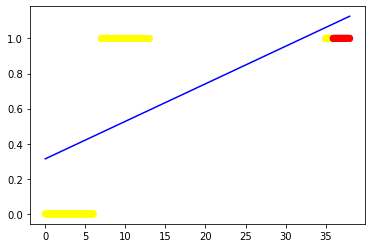

In [ ]:
lr=0.1
lin_reg=lin_regression()
# insert your code here
# w_predicted, error = ln_reg.Regression_grad_des(x_aug,y,lr)
w_opt = ln_reg.mat_inv(y, x_aug)
print(w_opt)
# w_predicted, error = ln_reg.Regression_grad_des(x_aug,y,lr)
# print(w_predicted)
x_1 = np.linspace(0,38,300)
y_1 = w_opt[0] + w_opt[1]*x_1
y_2 = [(1 if y_3>0.5 else 0) for y_3 in y_1]
plt.scatter(x,y,c=y_2[::-1],cmap='autumn')
plt.plot(x_1,y_1,'b')
plt.show()

# logistic regression
1. Error surface (logistic loss vs. MSE)
2. Solve the outlair issue
3. Circularly separable data classification
4. Multiclass classification

## Error surface (logistic loss vs. MSE)

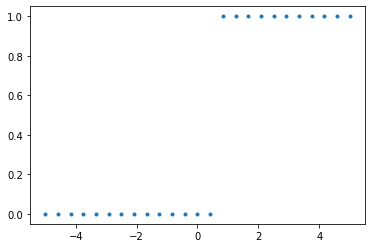

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x=np.linspace(-5,5,25)
y=np.zeros(x.shape)
y[np.where(x>0.7314)]=1

plt.plot(x,y,'.')

1. MSE=$\frac{1}{2N}\sum_{i=1}^{N}(y^{p}_{i}-y_{i})^2$, where $y^{p}=\frac{1}{1+e^{-w^{T}x}}$
2. Logistic loss=$-\frac{1}{N}\sum_{i=1}^{N}y_{i}log(y^{p}_{i})+(1-y_{i})log(1-y_{i}^{p})$

In [ ]:
# search space (only w1 is searched, where as w0 is fixed)
w1_in=10/(x[1]-x[0])
w0=-w1_in*0.7314
w1=np.linspace(-w1_in,4*w1_in,100)


cost_fn_mse=[]
cost_fn_logis=[]
for i in range(w1.shape[0]):
 # insert your code here
  y_pred = 1/(1+np.exp(-w1[i]*x-w0))
  cost_mse = (1/(2*x.shape[0]))*np.sum(np.square(y_pred-y))
  cost_fn_mse.append(cost_mse)
  cost_logis = 0
  for yi,yip in zip(y,y_pred):
    # print(yi,yip)
    if yi == 0 :
      if (1-yip)<0.01:
        cost_logis += 5
      else :
        cost_logis += np.log(1-yip)
    if yi == 1 :
      if yip<0.01:
        cost_logis += 5
      else:
        cost_logis += np.log(yip)
    # cost_logis += np.log(yip)
  cost_logis /= (-len(y))
  cost_fn_logis.append(cost_logis)
  # break


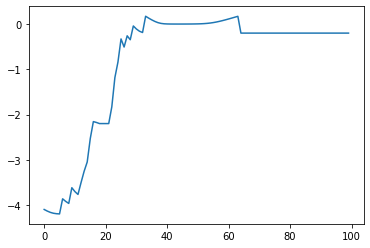

In [ ]:
plt.plot(cost_fn_logis)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


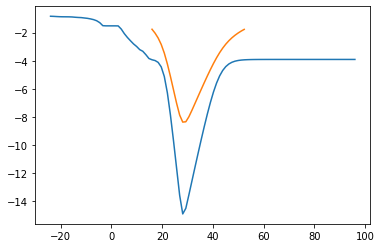

In [ ]:
# ploting of error surface
plt.figure()
plt.plot(w1,np.log(cost_fn_mse))
plt.plot(w1,np.log(cost_fn_logis))

## Solve the outlier issue


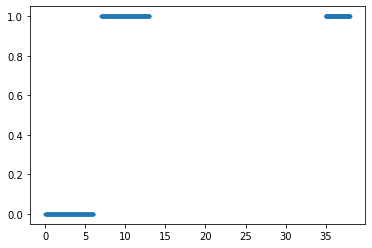

In [ ]:
# logistic regression
import numpy as np
import matplotlib.pyplot as plt

# insert your code here
y1 = np.zeros(100)
y2 = np.ones(100)
y3 = np.ones(100)
y = np.concatenate((y1,y2,y3))
x1 = np.linspace(0,6,100)#np.concatenate((np.linspace(0,6,100).reshape(100,1),np.zeros(100).reshape(100,1)),axis=1)
x2 = np.linspace(7,13,100)#np.concatenate((np.linspace(7,13,100).reshape(100,1),np.ones(100).reshape(100,1)),axis=1)
x3 = np.linspace(35,38,100)
x = np.concatenate((x1,x2,x3))
# plt.scatter(x,y)

plt.figure()
plt.plot(x,y,'.')

In [7]:
class logis_regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable
  
  def logis(self,x,w_old):
    # print(w_old.shape,x.shape)
    op = 1/(1 + np.exp(-x.T @ w_old))
    # print(op.shape)
    return op

  def grad_update(self,w_old,lr,y,x):
    # print(x.shape,y.shape,self.logis(x,w_old).shape)
    w = w_old + 2*lr*(x @ (y.reshape(y.shape[0],1) - self.logis(x,w_old)))/y.shape[0]
    # print(w_old.shape,w.shape,)
    return w

  def error(self,w,y,x):
    # print(x.shape,y.shape,w.shape)
    return -np.average(y*np.log(self.logis(x,w)) + (1-y)*np.log(1-self.logis(x,w)))

    # by Gradien descent
  def Regression_grad_des(self,x,y,lr):
    err=[]
    w_pred = np.random.rand(x.shape[0],1)
    # print(w_pred.shape)
    error1 = self.error(w_pred,y,x)
    for i in range(1000):
      w_pred = self.grad_update(w_pred,lr,y,x)
      error_new = self.error(w_pred,y,x)
      err.append(error_new)
      dev = error1 - error_new
      if dev<=10**(-20):
        break
      error1 = error_new
    err = np.array(err)
    # print(w_pred.shape)
    return w_pred,err

In [ ]:
# augmentation and data formating

x=x[:,np.newaxis]
y=y[:,np.newaxis]
print(x.shape)
x_aug=np.concatenate((np.ones((1,x.shape[0])), x.T),axis=0)
print(x_aug.shape)


(300, 1)
(2, 300)


(2, 1)


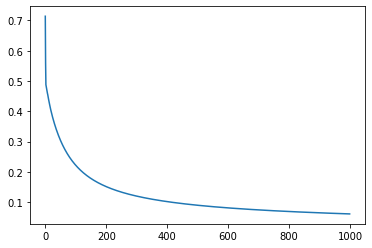

In [ ]:



log_reg=logis_regression()
w_pred,err=log_reg.Regression_grad_des(x_aug,y,0.1)
print(w_pred.shape)

plt.plot(err)

In [ ]:
w_pred.shape

(2, 1)

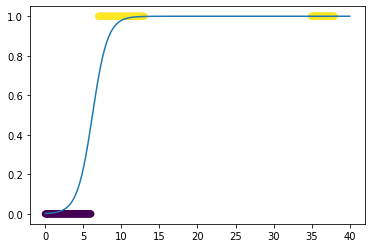

In [ ]:
# output computation
# insert your code here

# def sigmoid(w,x):
#   return 1/(1 + np.exp(x@))

def sigmoid(w, x):
  return 1/(1+np.exp(-w[1]*x - w[0]))
# insert your code here
x_gen = np.linspace(0,40,300)
y_1=[]
for i in x_gen:
  y_1.append(sigmoid(w_pred,i))
y_1 = np.array(y_1)
c = []
for xi in x:
  if sigmoid(w_pred,xi)>0.5:
    c.append(1)
  else:
    c.append(0)

plt.scatter(x,y,c=c)
plt.plot(x_gen,y_1)
# plt.plot(x0,np.zeros((x0).shape),'o',color='y')
# plt.plot(x1,np.ones((x1).shape),'x',color='r')

## Classification of circularly separated data using logistic regression



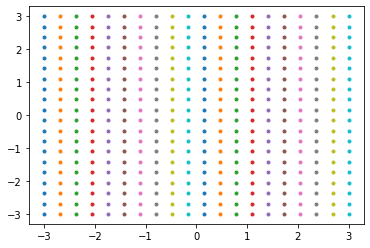

In [ ]:
# Generating circularly separated data
import numpy as np
import matplotlib.pyplot as plt


x1=np.linspace(-3,3,20)
x2=np.linspace(-3,3,20)

x11,x22=np.meshgrid(x1,x2)
plt.plot(x11,x22,'.')


1. Circularly separated data generation

(400, 2)
(32, 2)
(332, 2)
(364, 2)


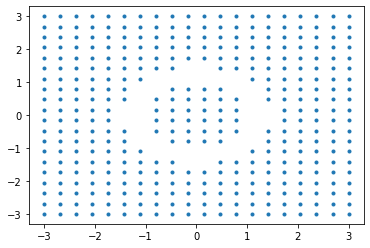

In [ ]:
x1=x11.flatten()
x2=x22.flatten()

x=np.concatenate((x1[:,np.newaxis],x2[:,np.newaxis]),axis=1) # to make matrix format
print(x.shape)

aind=np.where((x[:,0]**(2)+x[:,1]**(2))<=0.9)

bind=np.where((x[:,0]**(2)+x[:,1]**(2))>=2.2)

x1=x[aind[0],:]
x2=x[bind[0],:]
print(x1.shape)
print(x2.shape)
x=np.concatenate((x1,x2))
print(x.shape)

plt.plot(x[:,0],x[:,1],'.')

As in case of circularly separated data, the boundary is nonlinear, so squred feature is taken.

(364, 5)
[[-4.54922825e+00]
 [ 5.79240483e-04]
 [ 1.28298169e-04]
 [ 3.14694052e+00]
 [ 3.14658725e+00]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in multiply


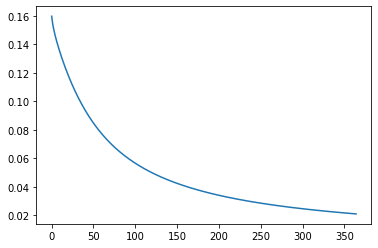

In [ ]:
# perform logistic regression

y1=np.zeros((x1.shape[0]))
y2=np.ones((x2.shape[0]))
y=np.concatenate((y1,y2))

x_aug=np.concatenate((np.ones((x.shape[0],1)), x[:,0].reshape(364,1), x[:,1].reshape(364,1), (x[:,0]*x[:,0]).reshape(364,1), (x[:,1]*x[:,1]).reshape(364,1)), axis=1)    # squring to learn circular separation
print(x_aug.shape)

log_reg=logis_regression()
w_pred,err=log_reg.Regression_grad_des(x_aug.T,y[:,np.newaxis],0.3)
print(w_pred)
plt.plot(err)



Plot classification using 0.5 as threshold

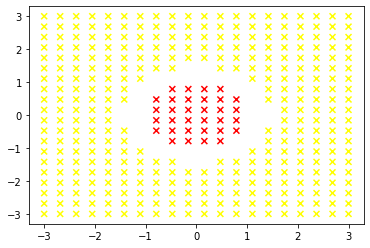

In [ ]:
def sigmoid(w, x):
  return 1/(1+np.exp(-x @ w))

y_pred=sigmoid(w_pred, x_aug)

c_pred = []
for yi in y_pred:
  if yi > 0.5:
    c_pred.append(1)
  else:
    c_pred.append(0)

plt.scatter(x[:,0],x[:,1],c=c_pred,marker='x',cmap='autumn')

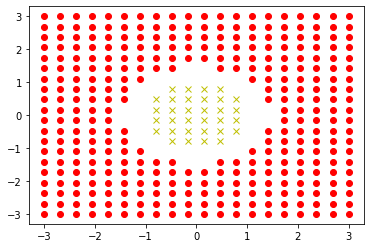

In [ ]:
y_pred=log_reg.logis(x_aug,w_pred)

# insert your code here

x00=x[ind1,:]
x11=x[ind2,:]

plt.figure()
plt.plot(x00[:,0],x00[:,1],'x',color='y')
plt.plot(x11[:,0],x11[:,1],'o',color='r')

## Multiclass logistic regression

1. Generate 1D data with 3 classes


### One vs rest classification

1. lets take polynomial of order 2 (by seeing the data distribution)

(300,)


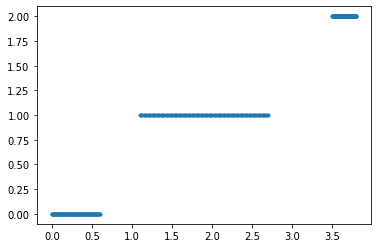

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x1=np.linspace(0,0.6,100)
x2=np.linspace(1.1,2.7,100)
x3=np.linspace(3.5,3.8,100)

x=np.concatenate((x1,x2,x3))
print(x.shape)

y1=np.zeros(x1.shape)
y2=np.ones(x2.shape)
y3=np.tile([2],x3.shape)

y=np.concatenate((y1,y2,y3))

plt.figure()
plt.plot(x,y,'.')


In [2]:
def data_transform(X,degree): 
  X_new=[]      
  for i in range(degree +1):
    X_new.append(X**i)              
  X_new = np.concatenate(X_new)  
  return X_new

In [3]:
x_aug=data_transform(x[np.newaxis,:],2)
print(x_aug.shape)

(3, 300)


(1, 300) (300,)


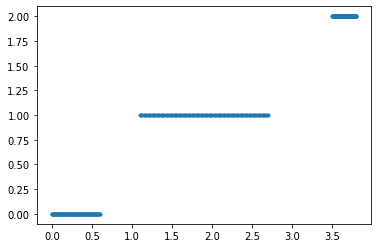

In [ ]:
print(x[np.newaxis,:].shape,x.shape)
plt.plot(x,y,'.')

[[-0.60890776]
 [ 0.76538463]
 [ 0.83228915]]


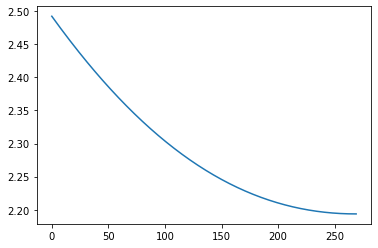

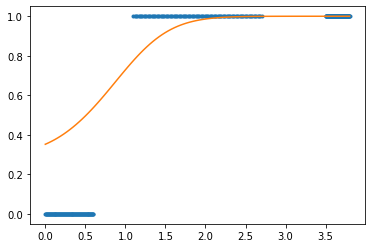

In [ ]:
# # plot for classification
# def plot_op(x,y_pred):
#   # insert your code here

#   x0=x[ind0,:]
#   x1=x[ind1,:]


#   plt.plot(x0,np.zeros((x0).shape),'o',color='y')
#   plt.plot(x1,np.ones((x1).shape),'x',color='r')
# take class 1 as '0' and other to '1'
# insert your code here

y1_mod = y.copy()

for temp in range(y.shape[0]):
  if y1_mod[temp] == 0:
    y1_mod[temp] = 0
  else:
    y1_mod[temp] = 1


log_reg=logis_regression()
w1_pred,err=log_reg.Regression_grad_des(x_aug,y1_mod,0.01)


plt.plot(err)
print(w1_pred)


# ploting
plt.figure()
plt.plot(x,y1_mod,'.')
x_1 = np.linspace(0,3.8,100)
x_11 = data_transform(x_1[np.newaxis,:],2)
y1_pred=log_reg.logis(x_11,w1_pred)
plt.plot(x_1,y1_pred)

[[ 0.51337651]
 [ 0.2556346 ]
 [-0.01270536]]


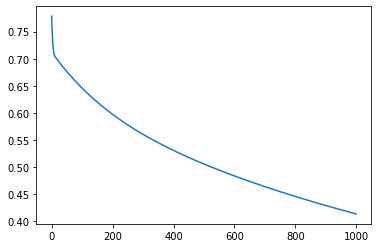

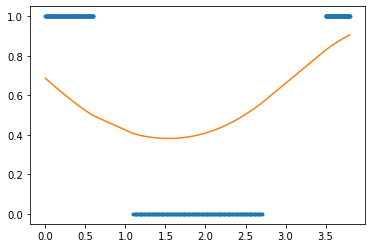

In [ ]:
# take class 0 as '0' and other to '1'
# insert your code here


# plt.plot(err)
# print(w1_pred)


# # ploting
# plt.figure()
# plt.plot(x,y1_mod,'.')

# y1_pred=log_reg.logis(x_aug,w1_pred)
# plt.plot(x,y1_pred[:,0])
# plot_op(x[:,np.newaxis],y1_pred)

y2_mod = y.copy()
for temp in range(y.shape[0]):
  if y2_mod[temp] == 1:
    y2_mod[temp] = 0
  else:
    y2_mod[temp] = 1


log_reg=logis_regression()
w2_pred,err=log_reg.Regression_grad_des(x_aug,y2_mod[:,np.newaxis],0.01)


plt.plot(err)
print(w1_pred)

# ploting
plt.figure()
plt.plot(x,y2_mod,'.')

y2_pred=log_reg.logis(x_aug,w2_pred)
plt.plot(x,y2_pred[:,0])

[[ 2.33707545]
 [ 1.68291593]
 [-0.86297642]]


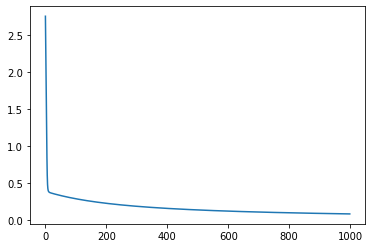

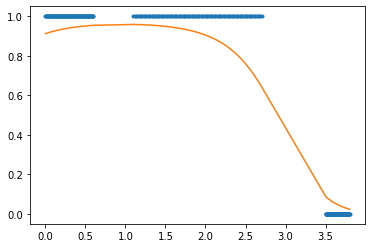

In [8]:
# take class 1 as '0' and other to '1'
# insert your code here



# ploting
# plt.figure()
# plt.plot(x,y2_mod,'.')

# y2_pred=log_reg.logis(x_aug,w2_pred)
# plt.plot(x,y2_pred[:,0])
# plot_op(x[:,np.newaxis],y2_pred)
y1_mod = y.copy()

for temp in range(y.shape[0]):
  if y1_mod[temp] == 2:
    y1_mod[temp] = 0
  else:
    y1_mod[temp] = 1


log_reg=logis_regression()
w1_pred,err=log_reg.Regression_grad_des(x_aug,y1_mod[:,np.newaxis],0.01)


plt.plot(err)
print(w1_pred)


# ploting
plt.figure()
plt.plot(x,y1_mod,'.')

y1_pred=log_reg.logis(x_aug,w1_pred)
plt.plot(x,y1_pred[:,0])

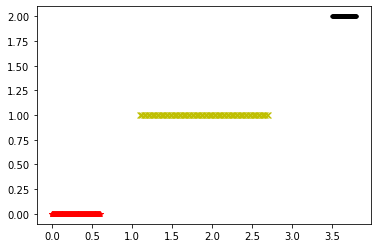

In [9]:
# final classification

# insert your code here  # as '0' is taken as referance
# insert your code here

plt.figure()
plt.plot(x1,np.zeros(x1.shape),'*',color='r')
plt.plot(x2,np.ones(x2.shape),'x',color='y')
plt.plot(x3,np.tile([2],x3.shape),'.',color='k')

[[ 4.02245634]
 [ 2.66007096]
 [-1.34592077]]


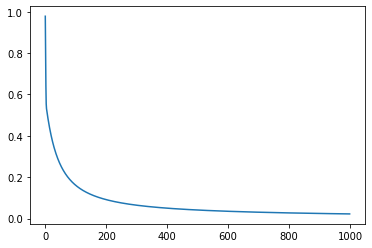

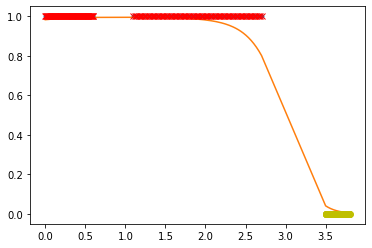

In [ ]:
# take class 2 as '0' and other to '1'
# insert your code here
# ploting
plt.figure()
plt.plot(x,y3_mod,'.')


y3_pred=log_reg.logis(x_aug,w3_pred)
plt.plot(x,y3_pred[:,0])

plot_op(x[:,np.newaxis],y3_pred)

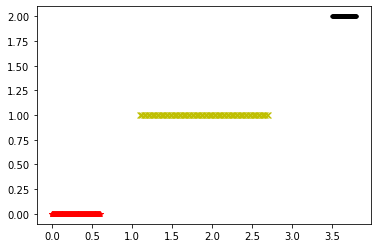

In [ ]:
# final classification

# insert your code here  # as '0' is taken as referance
# insert your code here

plt.figure()
plt.plot(x1,np.zeros(x1.shape),'*',color='r')
plt.plot(x2,np.ones(x2.shape),'x',color='y')
plt.plot(x3,np.tile([2],x3.shape),'.',color='k')


# Support vector machine

1. Try to maximize the margin of separation between data.
2. Instead of learning wx+b=0  separating hyperplane directly (like logistic regression), SVM try to learn wx+b=0, such that, the margin between two hyperplanes wx+b=1 and wx+b=-1 (also known as support vectors) is maximum. 
3. Margin between wx+b=1 and wx+b=-1 hyperplane is $\frac{2}{||w||}$
4. we have a constraint optimization problem of maximizing $\frac{2}{||w||}$, with constraints wx+b>=1 (for +ve class) and wx+b<=-1 (for -ve class).
5. As $y_{i}=1$ for +ve class and $y_{i}=-1$ for -ve class, the constraint can be re-written as:
$$y(wx+b)>=1$$

6. Final optimization is (i.e to find w and b):
$$\min_{||w||}\frac{1}{2}||w||,$$
$$y(wx+b) \geq 1,~\forall ~data $$












Acknowledgement:

https://pythonprogramming.net/predictions-svm-machine-learning-tutorial/

https://medium.com/deep-math-machine-learning-ai/chapter-3-1-svm-from-scratch-in-python-86f93f853dc

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Data generation:
1. Generate 2D gaussian data with fixed mean and variance for 2 class.(var=Identity, class1: mean[-4,-4], class2: mean[1,1], No. of data 25 from each class)
2. create the label matrix
3. Plot the generated data

(50, 2)
(50,)


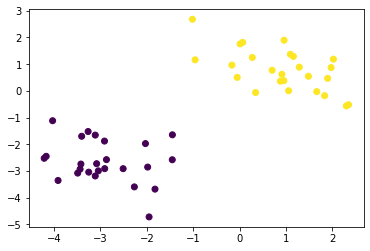

In [22]:
No_sample=50
mean1=np.array([-3,-3])
var1=np.array([[1,0],[0,1]])
mean2=np.array([1,1])
var2=var1
data1=np.random.multivariate_normal(mean1,var1,int(No_sample/2))
data2=np.random.multivariate_normal(mean2,var2,int(No_sample/2))
X=np.concatenate((data1,data2))
print(X.shape)
y=np.concatenate((-1*np.ones(data1.shape[0]),np.ones(data2.shape[0])))
print(y.shape)

plt.figure()
plt.scatter(X[:,0],X[:,1],marker='o',c=y)

Create a data dictionary, which contains both label and data points.

In [23]:
postiveX=[]
negativeX=[]
for i,v in enumerate(y):
    if v==-1:
        negativeX.append(X[i])
    else:
        postiveX.append(X[i])

#our data dictionary
data_dict = {-1:np.array(negativeX), 1:np.array(postiveX)} 

## SVM training
1. create a search space for w (i.e w1=w2),[0, 0.5*max((abs(feat)))] and  for b, [-max((abs(feat))),max((abs(feat)))], with appropriate step.
2. we will start with a higher step and find optimal w and b, then we will reduce the step and again re-evaluate the optimal one.

3. In each step, we will take transform of w, [1,1], [-1,1],[1,-1] and [-1,-1] to search arround the w. 

4. In every pass (for a fixed step size) we will store all the w, b and its corresponding ||w||, which make the data correctly classified as per the condition $y(wx+b) \geq 1$. 

5. Obtain the optimal hyperplane having minimum ||w||.

6. Start with the optimal w and repeat the same (step 3,4 and 5) for a reduced step size.


In [24]:
# it is just a searching algorithem, not a complicated optimization algorithem, (just for understanding of concepts through visualization)

# def SVM_Training(data_dict):

#     # insert your code here
    
#     return w,b

# it is just a searching algorithem, not a complicated optimization algorithem, (just for understanding of concepts through visualization)

def SVM_Training(data_dict):
    i=1
    global w
    global b
    # { ||w||: [w,b] }
    length_Wvector = {}
    transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
    
    b_step_size = 2
    b_multiple = 5
    w_optimum = max_feature_value*0.5

    for lrate in learning_rate:
        
        w = np.array([w_optimum,w_optimum])     
        optimized = False
        while not optimized:
            #b=[-maxvalue to maxvalue] we wanna maximize the b values so check for every b value
            for b in np.arange(-1*(max_feature_value*b_step_size), max_feature_value*b_step_size, lrate*b_multiple):
                for transformation in transforms:  # transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
                    w_t = w*transformation
                    
                    correctly_classified = True
                    
                    # every data point should be correct
                    for yi in data_dict:
                        for xi in data_dict[yi]:
                            if yi*(np.dot(w_t,xi)+b) < 1:  # we want  yi*(np.dot(w_t,xi)+b) >= 1 for correct classification
                                correctly_classified = False
                                
                    if correctly_classified:
                        length_Wvector[np.linalg.norm(w_t)] = [w_t,b] #store w, b for minimum magnitude
            
            if w[0] < 0:
                optimized = True
            else:
                w = w - lrate

        norms = sorted([n for n in length_Wvector])
        
        minimum_wlength = length_Wvector[norms[0]]
        w = minimum_wlength[0]
        b = minimum_wlength[1]
        
        w_optimum = w[0]+lrate*2



**Training**

In [25]:

#all the required variables 
w=[] #weights 2 dimensional vector
b=[] #bias
max_feature_value=float('-inf')
min_feature_value=float('+inf')
# w,b=SVM_Training(data_dict)
for yi in data_dict:
    if np.amax(data_dict[yi])>max_feature_value:
        max_feature_value=np.amax(data_dict[yi])
                
    if np.amin(data_dict[yi])<min_feature_value:
        min_feature_value=np.amin(data_dict[yi])
        
learning_rate = [max_feature_value * 0.1, max_feature_value * 0.01, max_feature_value * 0.001,]

SVM_Training(data_dict)
print(w)
print(b)
# print(w)
# print(b)

[0.6109059 0.6109059]
0.884205906220016


## Visualization of the SVM separating hyperplanes (after training)

In [26]:
def visualize(data_dict):
       
        
        
        
        plt.scatter(X[:,0],X[:,1],marker='o',c=y)

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane_value(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        
        hyp_x_min = np.min([np.min(data_dict[1]),np.min(data_dict[-1])])
        hyp_x_max = np.max([np.max(data_dict[1]),np.max(data_dict[-1])])

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane_value(hyp_x_min, w, b, 1)
        psv2 = hyperplane_value(hyp_x_max, w, b, 1)
        plt.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane_value(hyp_x_min, w, b, -1)
        nsv2 = hyperplane_value(hyp_x_max, w, b, -1)
        plt.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane_value(hyp_x_min, w, b, 0)
        db2 = hyperplane_value(hyp_x_max, w, b, 0)
        plt.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')
        
        
        

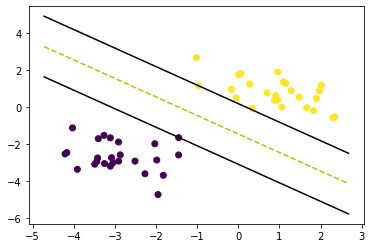

In [27]:
fig = plt.figure()
visualize(data_dict)

## Testing

1. Generate test data as like training
2. See the classification

3. if $wx_{test}+b > 0$, $y_{test}=1$ else $y_{test}=-1$


In [18]:
def predict(data,w,b):
  y_pred=np.sign(np.dot(data,w)+b)
  return y_pred

test accuracy= 100.0


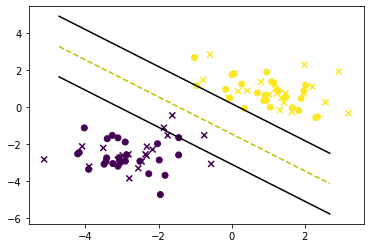

In [29]:
No_test_sample=40
data1=np.random.multivariate_normal(mean1,var1,int(No_test_sample/2))
data2=np.random.multivariate_normal(mean2,var2,int(No_test_sample/2))
test_data=np.concatenate((data1,data2))
y_gr=np.concatenate((-1*np.ones(data1.shape[0]),np.ones(data2.shape[0])))

# evaluate with the trained model

y_pred=predict(test_data,w,b)
accuracy=(1 - (sum((y_gr-y_pred)**2)/No_test_sample))*100.0
print('test accuracy=',accuracy)

#  Visualization
plt.figure()
visualize(data_dict)
plt.scatter(test_data[:,0],test_data[:,1],marker='x',c=y_gr)


